# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing The Data

In [3]:
df = pd.read_csv(r"customer_churn_data.csv")
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


# Data Preprocessing

### Knowing The Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


### Handling Missing Values

In [6]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [7]:
df['InternetService'] = df['InternetService'].fillna("Unknown")

In [8]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
Unknown        297
Name: count, dtype: int64

### Check For Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

## EDA

In [10]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [11]:
df.groupby(["Churn","Gender"])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [12]:
gb1 = df.groupby('ContractType')["MonthlyCharges"].mean()
gb1

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

Short term contracts monthly charge average increases.

### Correlation

In [13]:
numeric_cols = df.select_dtypes(include = 'number')

In [14]:
numeric_cols.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


### Data Visualization

In [15]:
churn = df['Churn'].value_counts()
churn

Churn
Yes    883
No     117
Name: count, dtype: int64

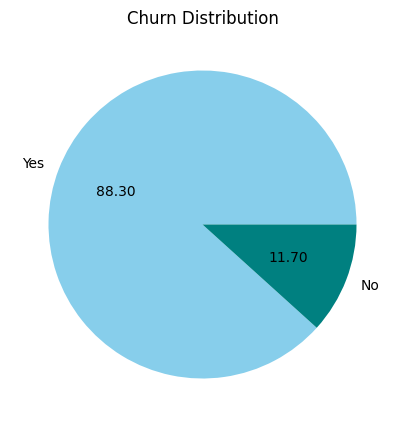

In [64]:
plt.figure(figsize = (5,5))
plt.title("Churn Distribution")
plt.pie(churn, labels = churn.index, autopct = "%0.2f", colors = ["Skyblue","Teal"])
plt.show()

### Univariate Analysis

#### Categorical Data

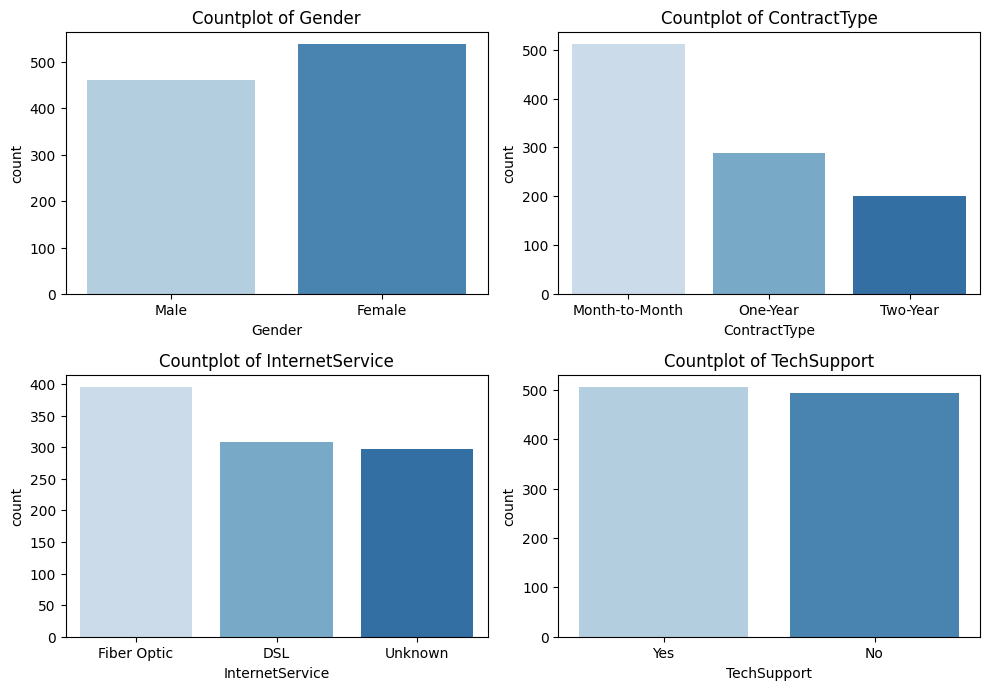

In [17]:
categorical_cols = ['Gender', 'ContractType', 'InternetService', 'TechSupport']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="Blues")
    axes[i].set_title(f'Countplot of {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)

# Hide any unused subplots (if total plots < nrows*ncols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Numerical Data

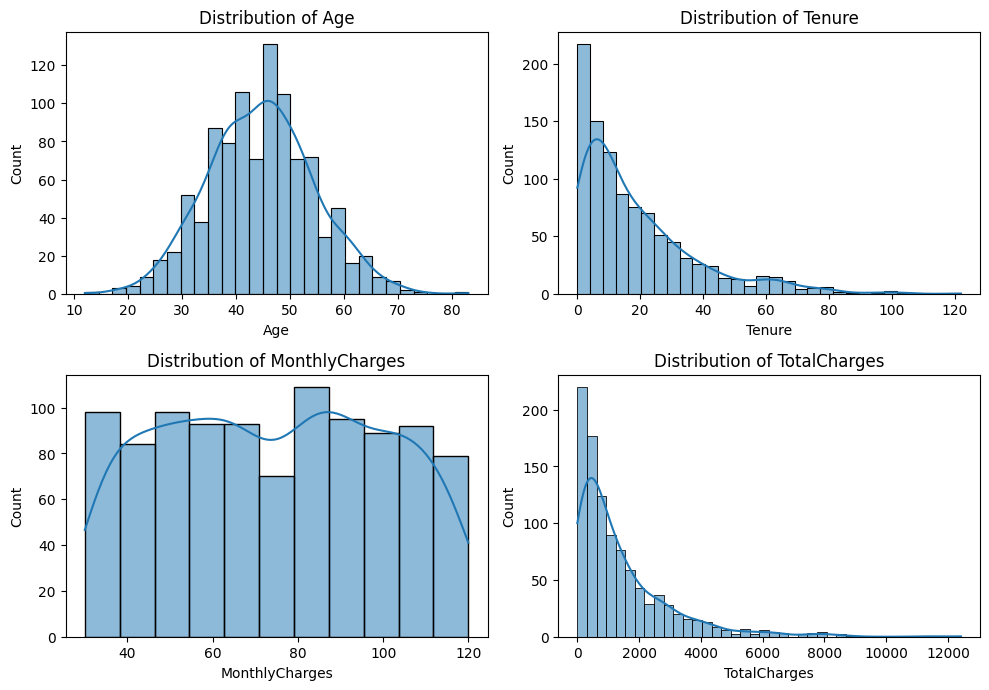

In [18]:
numerical_cols = df[["Age", "Tenure", "MonthlyCharges", "TotalCharges"]]
fig, axes = plt.subplots(3,2, figsize = (10,10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(x=col, data=df, ax=axes[i], kde=True, palette="Blues")
    axes[i].set_title(f"Distribution of {col}", fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Categorical Data

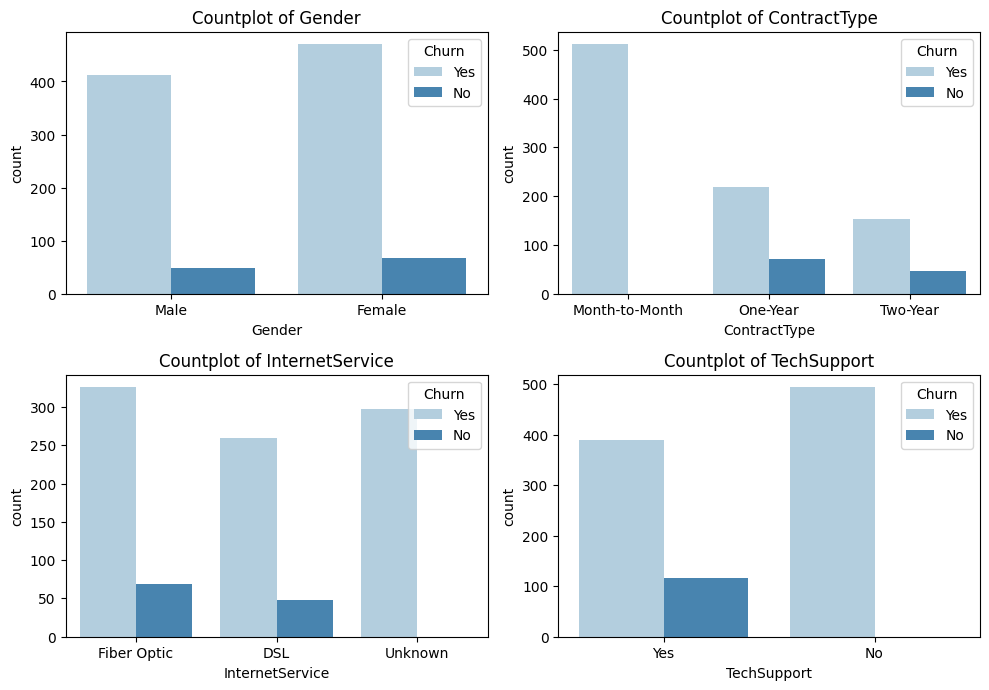

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, hue=df['Churn'], ax=axes[i], palette="Blues")
    axes[i].set_title(f'Countplot of {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)

# Hide any unused subplots (if total plots < nrows*ncols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [20]:
categorical_cols = ['Gender', 'ContractType', 'InternetService', 'TechSupport']

for col in categorical_cols:
    churn_rate = df.groupby(col)['Churn'].value_counts().unstack().fillna(0)
    print(f"\nChurn Rate by {col}:\n")
    print(churn_rate)
    print("______________________________")


Churn Rate by Gender:

Churn   No  Yes
Gender         
Female  68  470
Male    49  413
______________________________

Churn Rate by ContractType:

Churn             No    Yes
ContractType               
Month-to-Month   0.0  511.0
One-Year        71.0  218.0
Two-Year        46.0  154.0
______________________________

Churn Rate by InternetService:

Churn              No    Yes
InternetService             
DSL              48.0  260.0
Fiber Optic      69.0  326.0
Unknown           0.0  297.0
______________________________

Churn Rate by TechSupport:

Churn           No    Yes
TechSupport              
No             0.0  494.0
Yes          117.0  389.0
______________________________


#### Numerical Data

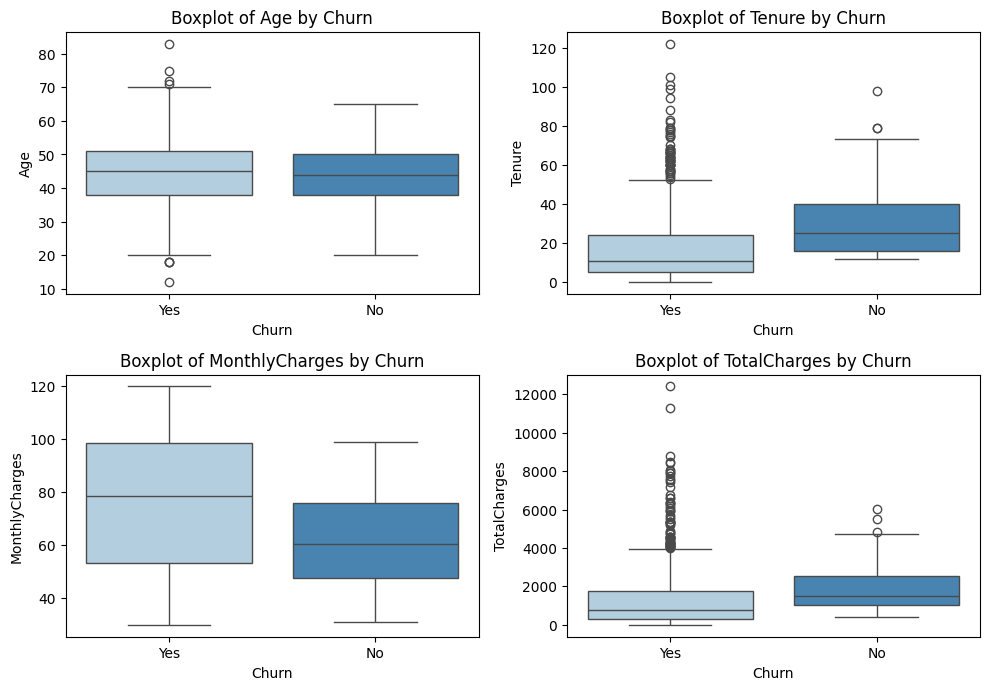

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i], palette="Blues")
    axes[i].set_title(f'Boxplot of {col} by Churn')

for j in range(i+1,len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

## Dependent and Independent Features

In [22]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [23]:
y = df.iloc[:,9:].values
y

array([['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
    

In [24]:
x = df.iloc[:,1:-3].values
x

array([[49, 'Male', 4, 88.35, 'Month-to-Month', 'Fiber Optic'],
       [43, 'Male', 0, 36.67, 'Month-to-Month', 'Fiber Optic'],
       [51, 'Female', 2, 63.79, 'Month-to-Month', 'Fiber Optic'],
       ...,
       [51, 'Female', 15, 111.72, 'Month-to-Month', 'Fiber Optic'],
       [39, 'Male', 68, 65.67, 'One-Year', 'Unknown'],
       [50, 'Male', 1, 56.67, 'Month-to-Month', 'Unknown']], dtype=object)

### Feature Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [26]:
LE = LabelEncoder() #for features with 2 categories
LE

LabelEncoder()

In [27]:
y = LE.fit_transform(y)        # 0=No 1=Yes  
y                       

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [28]:
x[:,1] = LE.fit_transform(x[:,1])  # 0=Male  1=Female
x[:,1]

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,

In [29]:
OHEn = OneHotEncoder()    #for featured with 3 or more categories  
OHEn

OneHotEncoder()

In [30]:
df["ContractType"].unique()

array(['Month-to-Month', 'One-Year', 'Two-Year'], dtype=object)

In [31]:
df["InternetService"].unique()

array(['Fiber Optic', 'DSL', 'Unknown'], dtype=object)

In [32]:
from sklearn.compose import ColumnTransformer

In [33]:
ct = ColumnTransformer(transformers=[('encoder', OHEn, [4,5])], remainder='passthrough')

In [34]:
x = ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 1, 4, 88.35],
       [1.0, 0.0, 0.0, ..., 1, 0, 36.67],
       [1.0, 0.0, 0.0, ..., 0, 2, 63.79],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 15, 111.72],
       [0.0, 1.0, 0.0, ..., 1, 68, 65.67],
       [1.0, 0.0, 0.0, ..., 1, 1, 56.67]], dtype=object)

In [35]:
x[0:3,0:10]

array([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 49, 1, 4, 88.35],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 43, 1, 0, 36.67],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 51, 0, 2, 63.79]], dtype=object)

### Splitting The Dataset

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [37]:
x_train

array([[0.0, 0.0, 1.0, ..., 0, 33, 50.35],
       [1.0, 0.0, 0.0, ..., 0, 1, 77.91],
       [0.0, 1.0, 0.0, ..., 1, 13, 101.33],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 46, 32.32],
       [1.0, 0.0, 0.0, ..., 1, 14, 36.91],
       [0.0, 0.0, 1.0, ..., 1, 11, 104.91]], dtype=object)

### Standardization (Feature Scaling)

In [38]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [39]:
x_train = std.fit_transform(x_train)
x_train

array([[-1.00501256, -0.64881365,  1.9922209 , ..., -0.93228691,
         0.71441607, -0.97413768],
       [ 0.99501244, -0.64881365, -0.50195237, ..., -0.93228691,
        -0.94671485,  0.10025559],
       [-1.00501256,  1.54127461, -0.50195237, ...,  1.07263117,
        -0.32379075,  1.01325597],
       ...,
       [ 0.99501244, -0.64881365, -0.50195237, ...,  1.07263117,
         1.3892505 , -1.67701543],
       [ 0.99501244, -0.64881365, -0.50195237, ...,  1.07263117,
        -0.27188041, -1.49807983],
       [-1.00501256, -0.64881365,  1.9922209 , ...,  1.07263117,
        -0.42761144,  1.15281794]])

In [40]:
x_test = std.transform(x_test)
x_test

array([[-1.00501256,  1.54127461, -0.50195237, ...,  1.07263117,
        -0.79098382,  1.04990073],
       [ 0.99501244, -0.64881365, -0.50195237, ...,  1.07263117,
         0.03958164, -1.72223663],
       [ 0.99501244, -0.64881365, -0.50195237, ..., -0.93228691,
        -0.84289416, -0.04944217],
       ...,
       [ 0.99501244, -0.64881365, -0.50195237, ..., -0.93228691,
         1.18160914, -1.53238556],
       [-1.00501256, -0.64881365,  1.9922209 , ...,  1.07263117,
         1.80453323, -0.94723887],
       [ 0.99501244, -0.64881365, -0.50195237, ..., -0.93228691,
        -0.68716314,  1.05496862]])

### Handling Class Imbalance

In [41]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
x_train, y_train = sm.fit_resample(x_train, y_train)

### Model Development

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
from sklearn.linear_model import LogisticRegression

log_param = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs'],
    'penalty': ['l2']
}

log_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=0), log_param, cv=5, scoring='f1')
log_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='f1')

In [44]:
log_model = log_grid.best_estimator_
y_pred1 = log_model.predict(x_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [45]:
from sklearn.svm import SVC

svm_param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'class_weight': ['balanced']
}

svm_grid = GridSearchCV(SVC(random_state=0, probability=True), svm_param, cv=5, scoring='f1')
svm_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [46]:
svm_model = svm_grid.best_estimator_
y_pred2 = svm_model.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), dt_param, cv=5, scoring='f1')
dt_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [48]:
dt_model = dt_grid.best_estimator_
y_pred3 = dt_model.predict(x_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_param = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=0), rf_param, cv=5, scoring='f1')
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [50]:
rf_model = rf_grid.best_estimator_
y_pred4 = rf_model.predict(x_test)
y_pred4

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn_param = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param, cv=5, scoring='f1')
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': [3, 5, 7, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1')

In [52]:
knn_model = knn_grid.best_estimator_
y_pred5 = knn_model.predict(x_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [53]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [54]:
y_pred6 = nb_model.predict(x_test)
y_pred6

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1])

### Performance Metrics

____________________________________________________________

 => Model: Logistic Regression
____________________________________________________________
Confusion Matrix:
------------------------------------------------------------
[[ 23   1]
 [ 18 158]]
____________________________________________________________

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.5610    0.9583    0.7077        24
           1     0.9937    0.8977    0.9433       176

    accuracy                         0.9050       200
   macro avg     0.7773    0.9280    0.8255       200
weighted avg     0.9418    0.9050    0.9150       200

____________________________________________________________
AUC-ROC Score: 0.9728
------------------------------------------------------------


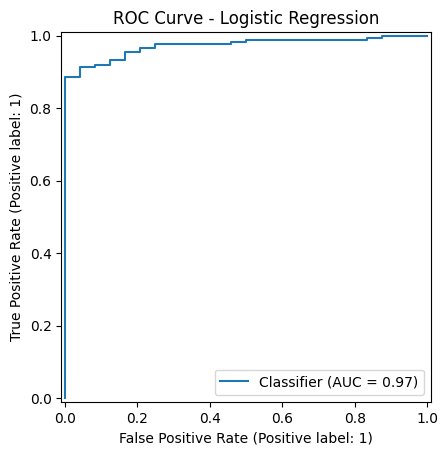

____________________________________________________________

 => Model: SVM
____________________________________________________________
Confusion Matrix:
------------------------------------------------------------
[[ 21   3]
 [  8 168]]
____________________________________________________________

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.7241    0.8750    0.7925        24
           1     0.9825    0.9545    0.9683       176

    accuracy                         0.9450       200
   macro avg     0.8533    0.9148    0.8804       200
weighted avg     0.9515    0.9450    0.9472       200

____________________________________________________________
AUC-ROC Score: 0.9804
------------------------------------------------------------


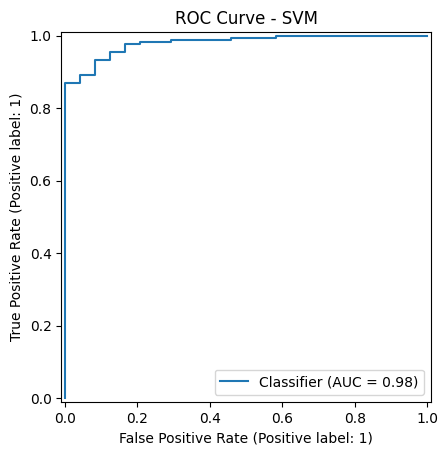

____________________________________________________________

 => Model: Decision Tree
____________________________________________________________
Confusion Matrix:
------------------------------------------------------------
[[ 22   2]
 [  3 173]]
____________________________________________________________

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.8800    0.9167    0.8980        24
           1     0.9886    0.9830    0.9858       176

    accuracy                         0.9750       200
   macro avg     0.9343    0.9498    0.9419       200
weighted avg     0.9755    0.9750    0.9752       200

____________________________________________________________
AUC-ROC Score: 0.9512
------------------------------------------------------------


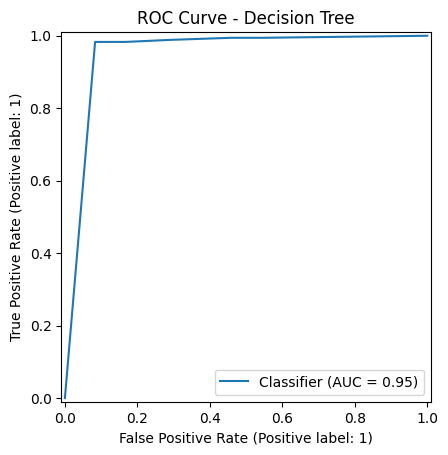

____________________________________________________________

 => Model: Random Forest
____________________________________________________________
Confusion Matrix:
------------------------------------------------------------
[[ 23   1]
 [  2 174]]
____________________________________________________________

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9200    0.9583    0.9388        24
           1     0.9943    0.9886    0.9915       176

    accuracy                         0.9850       200
   macro avg     0.9571    0.9735    0.9651       200
weighted avg     0.9854    0.9850    0.9851       200

____________________________________________________________
AUC-ROC Score: 0.9949
------------------------------------------------------------


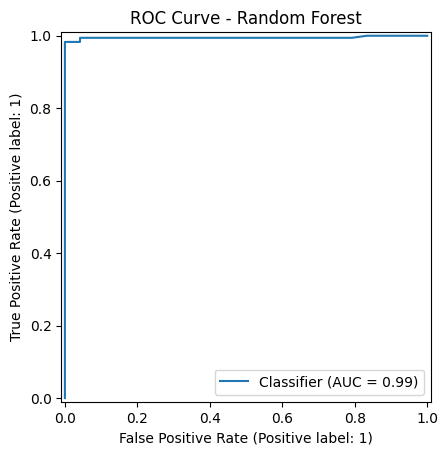

____________________________________________________________

 => Model: KNN
____________________________________________________________
Confusion Matrix:
------------------------------------------------------------
[[ 22   2]
 [ 16 160]]
____________________________________________________________

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.5789    0.9167    0.7097        24
           1     0.9877    0.9091    0.9467       176

    accuracy                         0.9100       200
   macro avg     0.7833    0.9129    0.8282       200
weighted avg     0.9386    0.9100    0.9183       200

____________________________________________________________
AUC-ROC Score: 0.9389
------------------------------------------------------------


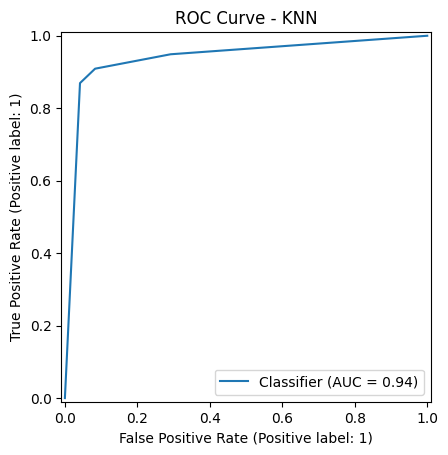

____________________________________________________________

 => Model: Naive Bayes
____________________________________________________________
Confusion Matrix:
------------------------------------------------------------
[[ 24   0]
 [ 38 138]]
____________________________________________________________

Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.3871    1.0000    0.5581        24
           1     1.0000    0.7841    0.8790       176

    accuracy                         0.8100       200
   macro avg     0.6935    0.8920    0.7186       200
weighted avg     0.9265    0.8100    0.8405       200

____________________________________________________________
AUC-ROC Score: 0.9706
------------------------------------------------------------


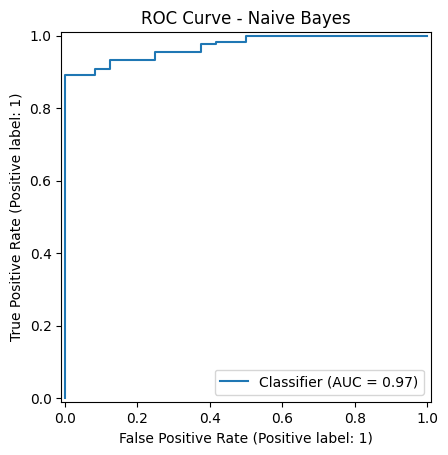

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Store all predictions and models
model_names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "KNN", "Naive Bayes"]
y_preds = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]
models = [log_model, svm_model, dt_model, rf_model, knn_model, nb_model]

# Evaluate each model
for name, model, y_pred in zip(model_names, models, y_preds):
    print("____________________________________________________________")
    print(f"\n => Model: {name}")
    print("____________________________________________________________")
    print("Confusion Matrix:")
    print("------------------------------------------------------------")
    print(confusion_matrix(y_test, y_pred))
    print("____________________________________________________________")
    print("\nClassification Report:")
    print("------------------------------------------------------------")
    print(classification_report(y_test, y_pred, digits=4))
    print("____________________________________________________________")

    # AUC ROC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(x_test)
    else:
        y_prob = None

    if y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC Score: {auc:.4f}")
        print("------------------------------------------------------------")
        
        RocCurveDisplay.from_predictions(y_test, y_prob)
        plt.title(f"ROC Curve - {name}")
        plt.show()
    else:
        print("Model does not support probability estimates — ROC AUC not available.")
